# Travel Planner Based On Currency Conversion Risk -- Dashboard

### Import Library

In [1]:
import panel as pn
pn.extension('plotly')
import hvplot.pandas
import matplotlib.pyplot as plt
#Supress plots warning
# import matplotlib.pyplot as plt
# plt.rcParams.update({'figure.max_open_warning': 0})

import os
import requests
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data as wb
import seaborn as sns
from dotenv import load_dotenv
import numpy as np
%matplotlib inline
import json
from forex_python.converter import CurrencyRates
import datetime as dt
from countryinfo import CountryInfo
from yahoofinancials import YahooFinancials
import plotly.express as px
from pathlib import Path
#Interactive Plot 
import plotly.offline as pyo
#Candlestick Chart
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'
from MCForecastTools import MCSimulation


### Load Enviornments 

In [2]:
# Load .env enviroment variables
load_dotenv()

# Set up API credentials

# Set Alpha Vantage API keys 
alpha_vantage_api_key = os.getenv("ALPHA_VANTAGE_API")
alpha_vantage_api_key2 = os.getenv("ALPHA_VANTAGE_AP2")
alpha_vantage_api_key3 = os.getenv("ALPHA_VANTAGE_API3")

# Verify that Alpha Vantage keys was correctly loaded
print(f"Alpha Vantage Key type: {type(alpha_vantage_api_key)}")
print(f"Alpha Vantage Key type: {type(alpha_vantage_api_key2)}")
print(f"Alpha Vantage Key type: {type(alpha_vantage_api_key3)}")

# Set the Mapbox API key
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Verify that Mapbox API key was correctly loaded
print(f"Mapbox Key type: {type(map_box_api)}")

Alpha Vantage Key type: <class 'str'>
Alpha Vantage Key type: <class 'NoneType'>
Alpha Vantage Key type: <class 'str'>
Mapbox Key type: <class 'str'>


## Variables

In [3]:
name = "Singapore"
country_name = CountryInfo(name).name()
country_border= CountryInfo(name).borders()
country_capital= CountryInfo(name).capital()
country_currency = CountryInfo(name).currencies()
country_timezone = CountryInfo(name).timezones()
country_wiki = CountryInfo(name).wiki()
country_info = print(f"Country name: {country_name}", '\n'
                      f"Country Capital: {country_capital}", '\n'
                      f"Country Border: {country_border}", '\n' 
                      f"Country Currency: {country_currency}", '\n' 
                      f"Country Timezone: {country_timezone}", '\n'
                      f"Country Wiki: {country_wiki}")

#-
name_2 = "Turkey"
country_name_2 = CountryInfo(name_2).name()
country_border_2= CountryInfo(name_2).borders()
country_capital_2= CountryInfo(name_2).capital()
country_currency_2 = CountryInfo(name_2).currencies()
country_timezone_2 = CountryInfo(name_2).timezones()
country_wiki_2 = CountryInfo(name_2).wiki()
country_info_2 = print(f"Country name: {country_name_2}", '\n'
                      f"Country Capital: {country_capital_2}", '\n'
                      f"Country Border: {country_border_2}", '\n' 
                      f"Country Currency: {country_currency_2}", '\n' 
                      f"Country Timezone: {country_timezone_2}", '\n'
                      f"Country Wiki: {country_wiki_2}")

#-
name_3 = "United Kingdom"
country_name_3 = CountryInfo(name_3).name()
country_border_3= CountryInfo(name_3).borders()
country_capital_3= CountryInfo(name_3).capital()
country_currency_3 = CountryInfo(name_3).currencies()
country_timezone_3 = CountryInfo(name_3).timezones()
country_wiki_3 = CountryInfo(name_3).wiki()
country_info_3 = print(f"Country name: {country_name_3}", '\n'
                      f"Country Capital: {country_capital_3}", '\n'
             

         f"Country Border: {country_border_3}", '\n' 
                      f"Country Currency: {country_currency_3}", '\n' 
                      f"Country Timezone: {country_timezone_3}", '\n'
                      f"Country Wiki: {country_wiki_3}")
#-
pair = country_currency[0].strip("''")
forex_pair = pair + "USD"
pair_2 = country_currency_2[0].strip("''")
forex_pair_2 = pair_2 + "USD"
pair_3 = country_currency_3[0].strip("''")
forex_pair_3 = pair_3 + "USD"
#-
time_series = pdr.av.time_series.AVTimeSeriesReader(forex_pair, api_key='alpha_vantage_api_key')
forex = time_series.read()
forex.index = pd.to_datetime(forex.index, format='%Y-%m-%d')
Forex = forex
time_series_2 = pdr.av.time_series.AVTimeSeriesReader(forex_pair_2, api_key='alpha_vantage_api_key2')
forex_2 = time_series_2.read()
forex_2.index = pd.to_datetime(forex_2.index, format='%Y-%m-%d')
Forex_2 = forex_2
time_series_3 = pdr.av.time_series.AVTimeSeriesReader(forex_pair_3, api_key='alpha_vantage_api_key3')
forex_3 = time_series_3.read()
forex_3.index = pd.to_datetime(forex_3.index, format='%Y-%m-%d')
Forex_3 = forex_3
#-
forex_close = Forex.drop(columns=['volume', 'open', 'high', 'low'])
forex_2_close = Forex_2.drop(columns=['volume', 'open', 'high', 'low'])
forex_3_close = Forex_3.drop(columns=['volume', 'open', 'high', 'low'])
#-
joined_forex = pd.concat([forex_close, forex_2_close, forex_3_close], axis="columns", join="inner", keys=[f'{forex_pair}',f'{forex_pair_2}',f'{forex_pair_3}'])
#-
forex_stats = forex.describe()
forex_stats_2 = forex_2.describe()
forex_stats_3 = forex_3.describe()
#-
forex['MA20'] = forex['close'].rolling(window=20, min_periods=0).mean()
forex['std'] = forex['close'].rolling(window=20, min_periods=0).std(ddof = 0)
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair, 'Volume'), 
               row_width=[0.2, 0.7])
#-
forex_2['MA20'] = forex_2['close'].rolling(window=20, min_periods=0).mean()
forex_2['std'] = forex_2['close'].rolling(window=20, min_periods=0).std(ddof = 0)
fig_2 = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair_2, 'Volume'), 
               row_width=[0.2, 0.7])

#-
forex_3['MA20'] = forex_3['close'].rolling(window=20, min_periods=0).mean()
forex_3['std'] = forex_3['close'].rolling(window=20, min_periods=0).std(ddof = 0)
fig_3 = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair_3, 'Volume'), 
               row_width=[0.2, 0.7])
#-
ticker_data = pd.concat([forex], axis=1, keys=[f'{forex_pair}'])
ticker_data_2 = pd.concat([forex_2], axis=1, keys=[f'{forex_pair_2}'])
ticker_data_3 = pd.concat([forex_3], axis=1, keys=[f'{forex_pair_3}'])
#-
yahoo_financials = YahooFinancials('DX-Y.NYB')
read_us_dollar = YahooFinancials('DX-Y.NYB')
us_dollar = read_us_dollar.get_historical_price_data('2010-04-23', '2022-04-23', 'daily')
us_dollar_price = us_dollar["DX-Y.NYB"]["prices"]
us_dollar_df = pd.DataFrame(us_dollar_price)
us_dollar_df.set_index(pd.to_datetime(us_dollar_df['formatted_date'], infer_datetime_format=True), inplace=True)
us_dollar_df.drop(columns=['date', 'open', 'high', 'low', 'volume', 'adjclose', 'formatted_date'], inplace=True)
us_dollar_df.columns=['US Dollar Close']
us_dollar_df.isnull().sum()
us_dollar_df = us_dollar_df.dropna()
us_dollar_daily_returns = us_dollar_df.pct_change().dropna()
us_dollar_daily_returns.columns=['US Dollar Daily Returns']
#-
forex_daily_returns = forex_close.pct_change().dropna()
forex_daily_returns.columns=[f'{forex_pair} Daily Returns']
forex_2_daily_returns = forex_2_close.pct_change().dropna()
forex_2_daily_returns.columns=[f'{forex_pair_2} Daily Returns']
forex_3_daily_returns = forex_3_close.pct_change().dropna()
forex_3_daily_returns.columns=[f'{forex_pair_3} Daily Returns']
#-
joined_forex_daily_returns = pd.concat([forex_daily_returns, forex_2_daily_returns, forex_3_daily_returns], axis='columns', join='inner')
joined_data = pd.concat([joined_forex_daily_returns, us_dollar_daily_returns], axis='columns', join='inner')
#-
cum_returns = (1+joined_data).cumprod()
#-
joined_data_daily_returns_std = joined_data.std()
isolated_dollar = joined_data['US Dollar Daily Returns'].std()
annualized_std = joined_data_daily_returns_std * np.sqrt(252)
joined_forex_21_day_std = joined_data.rolling(window = 21).std()
#-
correlation = joined_data.corr()
covariance = (joined_data[f'{forex_pair} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
variance = joined_data['US Dollar Daily Returns'].var()
beta = covariance / variance
covariance_2 = (joined_data[f'{forex_pair_2} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
variance_2 = joined_data['US Dollar Daily Returns'].var()
beta_2 = covariance_2 / variance_2
covariance_3 = (joined_data[f'{forex_pair_3} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
variance_3 = joined_data['US Dollar Daily Returns'].var()
beta_3 = covariance / variance
#-
combined_data_sharpe_ratios = (joined_data.mean() * 252) / (joined_data_daily_returns_std * np.sqrt(252))
#-
csvpath = Path("all_countries.csv")
country_list_df = pd.read_csv(csvpath)
capital_city = []
lat_long = []
currency = []
subregion = []
wiki = []
lat = []
long = []
for country in country_list_df['Country']:
    country_data = CountryInfo(country)
    capital_city.append(country_data.capital())
    lat.append(country_data.capital_latlng()[0])
    long.append(country_data.capital_latlng()[1])
    currency.append(country_data.currencies())
    subregion.append(country_data.subregion())
    wiki.append(country_data.wiki()) 
country_list_df['Capital City'] = capital_city
country_list_df['Latitude'] = lat
country_list_df['Longitude'] = long
country_list_df['Currency'] = currency
country_list_df['Sub-Region'] = subregion
country_list_df['wiki'] = wiki

#-

log_returns = np.log(joined_forex/joined_forex.shift(1)).dropna()
daily_std = log_returns.std()
annualized_std = daily_std * np.sqrt(252)
#-


volatility_3_months  = log_returns.rolling(window=21*3).std()*np.sqrt(21*3)
plot_volatility_3 = volatility_3_months.droplevel(axis = 1, level = 1).plot(title="3 months Volatility", backend = "hvplot")
volatility_6_months = log_returns.rolling(window=21*6).std()*np.sqrt(21*6)
plot_volatility_6 = volatility_6_months.droplevel(axis = 1, level = 1).plot(title="6 months Volatility", backend = "hvplot")
volatility_12_months = log_returns.rolling(window=21*12).std()*np.sqrt(21*12)
plot_volatility_12 = volatility_12_months.droplevel(axis = 1, level = 1).plot(title="12 months Volatility", backend = "hvplot")

#-
sortino_volatility_3_months = log_returns[log_returns<0].rolling(window=21*3, center=True, min_periods=10).std()*np.sqrt(21*3)
sortino_volatility_3_months = sortino_volatility_3_months.droplevel(axis = 1, level = 1).plot(title="3 months Sortino Volatility", backend = "hvplot")
sortino_volatility_6_months = log_returns[log_returns<0].rolling(window=21*6, center=True, min_periods=10).std()*np.sqrt(21*6)
sortino_volatility_6_months = sortino_volatility_6_months.droplevel(axis = 1, level = 1).plot(title="6 months Sortino Volatility", backend = "hvplot")
sortino_volatility_12_months = log_returns[log_returns<0].rolling(window=21*12, center=True, min_periods=10).std()*np.sqrt(21*12)
sortino_volatility_12_months = sortino_volatility_12_months.droplevel(axis = 1, level = 1).plot(title="12 months Sortino Volatility", backend = "hvplot")

# #-
sortino_ratio_3_months = (log_returns.rolling(window=21*3,).mean() - 0.01/63)*21*3 / sortino_volatility_3_months
sortino_ratio_3 = sortino_ratio_3_months.droplevel(axis = 1, level = 1).plot(title="3 months Sortino Ratio", backend = "hvplot")
sortino_ratio_6_months = (log_returns.rolling(window=21*6).mean() - 0.01/126)*21*6 / sortino_volatility_6_months
sortino_ratio_6 = sortino_ratio_6_months.droplevel(axis = 1, level = 1).plot(title="6 months Sortino Ratio", backend = "hvplot")
sortino_ratio_12_months = (log_returns.rolling(window=21*12).mean() - 0.01/252)*21*12 / sortino_volatility_12_months
sortino_ratio_12 = sortino_ratio_12_months.droplevel(axis = 1, level = 1).plot(title="12 months Sortino Ratio", backend = "hvplot")

#-
def max_drawdown(returns):
    cumulative_returns = (returns+1).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns/peak)-1
    return drawdown.min()
returns = joined_forex.pct_change()
max_drawdowns = returns.apply(max_drawdown, axis=0)

#-
calmars = np.exp(log_returns.mean()*252)/abs(max_drawdowns)

#-
sims = 50

Country name: singapore 
Country Capital: Singapore 
Country Border: [] 
Country Currency: ['SGD'] 
Country Timezone: ['UTC+08:00'] 
Country Wiki: http://en.wikipedia.org/wiki/singapore
Country name: turkey 
Country Capital: Ankara 
Country Border: ['ARM', 'AZE', 'BGR', 'GEO', 'GRC', 'IRN', 'IRQ', 'SYR'] 
Country Currency: ['TRY'] 
Country Timezone: ['UTC+02:00'] 
Country Wiki: http://en.wikipedia.org/wiki/turkey
Country name: united kingdom 
Country Capital: London 
Country Border: ['IRL'] 
Country Currency: ['GBP'] 
Country Timezone: ['UTC−08:00', 'UTC−05:00', 'UTC−04:00', 'UTC−03:00', 'UTC−02:00', 'UTC', 'UTC+01:00', 'UTC+02:00', 'UTC+06:00'] 
Country Wiki: http://en.wikipedia.org/wiki/united_kingdom


# Panel Visualizations

## Functions

In [4]:
def singapore_plot():
    singapore_line_plot = forex[['close']].hvplot(
    xlabel= "Dates", 
    ylabel = f'{forex_pair}',
    rot = 45,
    title = f"Closing value of {forex_pair}",
    color = "dodgerblue",
    figsize = (20, 10));
    return singapore_line_plot


def turkey_plot():
    turkey_line_plot = forex_2[['close']].hvplot(
    xlabel= "Dates", 
    ylabel = f'{forex_pair_2}',
    rot = 45,
    title = f"Closing value of {forex_pair_2}",
    color = "green",
    figsize = (20, 10));
   
    return turkey_line_plot
#
def uk_plot():
    uk_line_plot = forex_3[['close']].hvplot(
    xlabel= "Dates", 
    ylabel = f'{forex_pair_3}',
    rot = 45,
    title = f"Closing value of {forex_pair_3}",
    color = "tomato",
    figsize = (20, 10));
    
    return uk_line_plot
#

def plot_singapore_candle_stick():
    
# Volume
    singapore_candle_stick_plot = fig.add_trace(go.Bar(x=forex.index, y=forex['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
    fig.add_trace(go.Scatter(x=forex.index, y=forex["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)

# Candlestick chart
    fig.add_trace(go.Candlestick(x=forex.index, open=forex["open"], high=forex["high"],
                low=forex["low"], close=forex["close"], name="OHLC"), 
                row=1, col=1)

# Create a Bollinger Band
# Upper Bound
    fig.add_trace(go.Scatter(x=forex.index, 
                         y=forex["MA20"] + (forex['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
    fig.add_trace(go.Scatter(x=forex.index, 
                         y=forex["MA20"] - (forex['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.01),
              row = 1, col = 1)
    fig.update_layout(
#    title= f'{forex_pair} Historical price chart',
        xaxis_tickfont_size=12,
        yaxis=dict(
            title='Price ($/share)',
            titlefont_size=14,
            tickfont_size=12,
        ),
        autosize=True,
        width=900,
        height=900,
        margin=dict(l=50, r=50, b=100, t=100, pad=4),
        paper_bgcolor='gainsboro'
    )
# Remove range slider; (short time frame)
    fig.update(layout_xaxis_rangeslider_visible=False)

    return singapore_candle_stick_plot
#-

def plot_turkey_candle_stick():

# Volume
    turkey_candle_stick_plot =fig_2.add_trace(go.Bar(x=forex_2.index, y=forex_2['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
    fig_2.add_trace(go.Scatter(x=forex_2.index, y=forex_2["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)



# Candlestick chart
    fig_2.add_trace(go.Candlestick(x=forex_2.index, open=forex_2["open"], high=forex_2["high"],
                    low=forex_2["low"], close=forex_2["close"], name="OHLC"), 
                    row=1, col=1)


# Create a Bollinger Band

# Upper Bound
    fig_2.add_trace(go.Scatter(x=forex_2.index, 
                             y=forex_2["MA20"] + (forex_2['std'] * 2),
                             line_color = 'gray',
                             line = {'dash': 'dash'},
                             name = 'upper band',
                             opacity = 0.5),
                  row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
    fig_2.add_trace(go.Scatter(x=forex_2.index, 
                             y=forex_2["MA20"] - (forex_2['std'] * 2),
                             line_color = 'gray',
                             line = {'dash': 'dash'},
                             fill = 'tonexty',
                             name = 'lower band',
                             opacity = 0.01),
                  row = 1, col = 1)


    fig_2.update_layout(
#    title= f'{forex_pair_2} Historical price chart',
        xaxis_tickfont_size=12,
        yaxis=dict(
            title='Price ($/share)',
            titlefont_size=14,
            tickfont_size=12,
        ),
        autosize=True,
        width=900,
        height=900,
        margin=dict(l=50, r=50, b=100, t=100, pad=4),
        paper_bgcolor='LightSteelBlue'
    
    )
# Remove range slider; (short time frame)
    fig_2.update(layout_xaxis_rangeslider_visible=False)

    return turkey_candle_stick_plot
#-


def plot_uk_candle_stick():
    
# Volume
    uk_candle_stick_plot = fig_3.add_trace(go.Bar(x=forex_3.index, y=forex_3['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
    fig_3.add_trace(go.Scatter(x=forex_3.index, y=forex_3["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)

# Candlestick chart
    fig_3.add_trace(go.Candlestick(x=forex_3.index, open=forex_3["open"], high=forex_3["high"],
                    low=forex_3["low"], close=forex_3["close"], name="OHLC"), 
                    row=1, col=1)

# Create a Bollinger Band
# Upper Bound
    fig_3.add_trace(go.Scatter(x=forex_3.index, 
                             y=forex_3["MA20"] + (forex_3['std'] * 2),
                             line_color = 'gray',
                             line = {'dash': 'dash'},
                             name = 'upper band',
                             opacity = 0.5),
                  row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
    fig_3.add_trace(go.Scatter(x=forex_3.index, 
                             y=forex_3["MA20"] - (forex_3['std'] * 2),
                             line_color = 'gray',
                             line = {'dash': 'dash'},
                             fill = 'tonexty',
                             name = 'lower band',
                             opacity = 0.01),
                  row = 1, col = 1)
    fig.update_layout(
#    title= f'{forex_pair_2} Historical price chart',
        xaxis_tickfont_size=12,
        yaxis=dict(
            title='Price ($/share)',
            titlefont_size=14,
            tickfont_size=12,
        ),
        autosize=True,
        width=900,
        height=900,
        margin=dict(l=50, r=50, b=100, t=100, pad=4),
        paper_bgcolor='LightSteelBlue'
    )
# Remove range slider; (short time frame)
    fig_3.update(layout_xaxis_rangeslider_visible=False)

    return uk_candle_stick_plot

#-
def singapore_currency_converter():
    singapore_converter = currency, amount = CurrencyRates(), int(1000)
    from_currency, to_currency = "USD", pair.upper()
    result =  currency.convert(from_currency, to_currency, amount)
    print("Conversion Amount: ", result)

    return singapore_converter
#- 
def turkey_currency_converter():
    france_converter = currency, amount = CurrencyRates(), int(1000)
    from_currency, to_currency = "USD", pair_2.upper()
    result =  currency.convert(from_currency, to_currency, amount)
    print("Conversion Amount: ", result)
    return france_converter
#-
def uk_currency_converter():
    uk_converter = currency, amount = CurrencyRates(), int(1000)
    from_currency, to_currency = "USD", pair_3.upper()
    result =  currency.convert(from_currency, to_currency, amount)
    print("Conversion Amount: ", result)
    return uk_converter
#-
def plot_singapore_monte_carlo_3_months():
    singapore_monte_carlo_3_months = forex_montecarlo = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = sims,
    num_trading_days = 21 * 3)
    forex_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot = forex_montecarlo.plot_simulation()[1]
    
    return line_plot.plot(legend = None, backend = "hvplot")
#-
def plot_singapore_monte_carlo_6_months():
    singapore_monte_carlo_6_months = forex_montecarlo = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = sims,
    num_trading_days = 21 * 6)
    forex_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot = forex_montecarlo.plot_simulation()[1]

    return line_plot.plot(legend = None, backend = "hvplot") 
#-
def plot_singapore_monte_carlo_12_months():
    singapore_monte_carlo_12_months = forex_montecarlo = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = sims,
    num_trading_days = 21 * 12)
    forex_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot = forex_montecarlo.plot_simulation()[1]

    return line_plot.plot(legend = None, backend = "hvplot")
#-
def plot_turkey_monte_carlo_3_months():
    turkey_monte_carlo_3_months = forex_2_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 3)
    forex_2_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_2 = forex_2_montecarlo.plot_simulation()[1]
    return line_plot_2.plot(legend = None, backend = "hvplot")
#-
def plot_turkey_monte_carlo_6_months():
    turkey_monte_carlo_6_months = forex_2_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 6)
    forex_2_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_2 = forex_2_montecarlo.plot_simulation()[1] 

    return line_plot_2.plot(legend = None, backend = "hvplot")
#-   
def plot_turkey_monte_carlo_12_months():
    turkey_monte_carlo_12_months = forex_2_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 12)
    forex_2_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_2 = forex_2_montecarlo.plot_simulation()[1] 

    return line_plot_2.plot(legend = None, backend = "hvplot")
#-   
def plot_uk_monte_carlo_3_months():
    uk_monte_carlo_3_months = forex_3_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 3)
    forex_3_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_3 = forex_3_montecarlo.plot_simulation()[1]

    return line_plot_3.plot(legend = None, backend = "hvplot")
#-

def plot_uk_monte_carlo_6_months():
    uk_monte_carlo_6_months = forex_3_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 6)
    forex_3_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_3 = forex_3_montecarlo.plot_simulation()[1]

    return line_plot_3.plot(legend = None, backend = "hvplot")
#-
def plot_uk_monte_carlo_12_months():
    uk_monte_carlo_12_months = forex_3_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 12)
    forex_3_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_3 = forex_3_montecarlo.plot_simulation()[1]

    return line_plot_3.plot(legend = None, backend = "hvplot")
#-
def plot_joined_data():
    joined_data_plot = joined_data.plot(title = "Performance Analysis of All Data's Daily Returns", figsize=(20,10))
    return joined_data_plot
#-

def plot_cumulative_returns():
    cumulative_returns = cum_returns.plot(title = "Cumulative Returns of All data's Daily Returns", figsize=(20,10))
    return cumulative_returns
#-
        
def plot_joined_data_box():
    joined_data_box_plot = joined_data.plot.box(title = "Box Plot of Daily Returns", figsize=(20,10))
    return joined_data_box_plot        
#-

def plot_joined_forex_21_day_std():
    joined_forex_21_day_std_plot = joined_forex_21_day_std.plot(title = "Plot Rolling STD for all countries currency", figsize=(20, 10))
    return joined_forex_21_day_std_plot     
#-

def plot_heatmap():
    heatmap = sns.heatmap(correlation, vmin=-1, vmax=1)
    return heatmap
#-

def plot_beta():
    beta_plot = sns.lmplot(x = "US Dollar Daily Returns", y = f"{forex_pair} Daily Returns", data = joined_data, aspect = 1.5, fit_reg = True)
    return beta_plot
#- 

def plot_beta_2():
    beta_plot_2 = sns.lmplot(x = "US Dollar Daily Returns", y = f"{forex_pair_2} Daily Returns", data = joined_data, aspect = 1.5, fit_reg = True)
    return plot_beta_2
#- 

def plot_beta_3():
    beta_plot_3 = sns.lmplot(x = "US Dollar Daily Returns", y = f"{forex_pair_3} Daily Returns", data = joined_data, aspect = 1.5, fit_reg = True)
    return beta_plot_3
#- 

def plot_combined_data_sharpe_ratio():
    combined_data_sharpe_ratio_plot = combined_data_sharpe_ratios.plot(kind="bar", title= "Combined Data Sharpe Ratios")
    return combined_data_sharpe_ratio_plot
#-

def plot_calmers(calmars):
    calmars_plot = calmars.droplevel(axis = 1, level = 1).plot.bar(backend = "hvplot")
    return calmers_plot.plot(legend = None, backend = "hvplot")
#-

def plot_world_map():
     world_map = px.scatter_mapbox(
     country_list_df,
     lat='Latitude',
     lon='Longitude', 
     zoom=1.2,
     color_continuous_scale=px.colors.cyclical.IceFire,
     hover_name="Country",
     title="All Countries populated on World Map",
     height = 600,
     width = 800  
     )
    
     return world_map

## Panel Dashboard

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 3

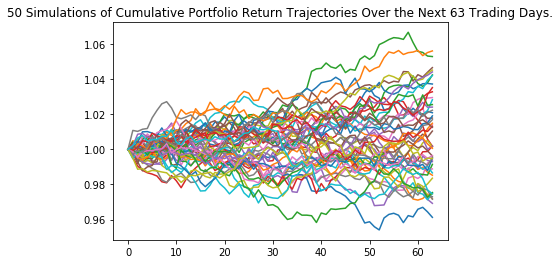

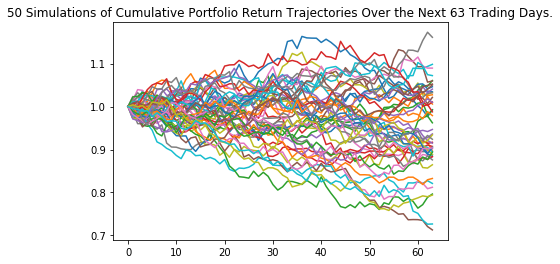

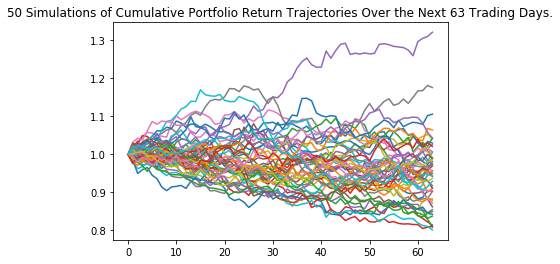

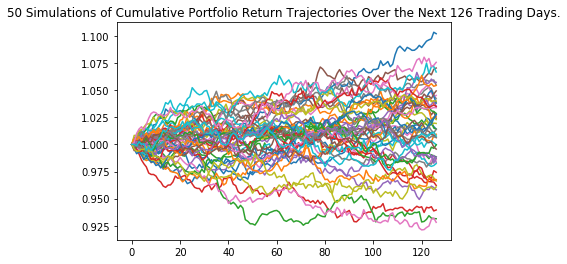

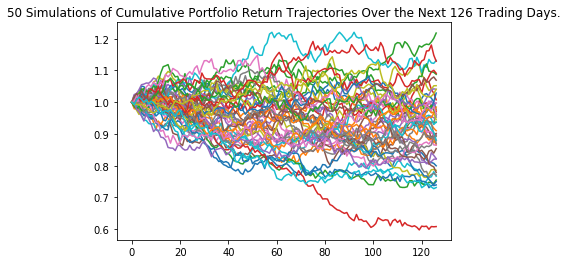

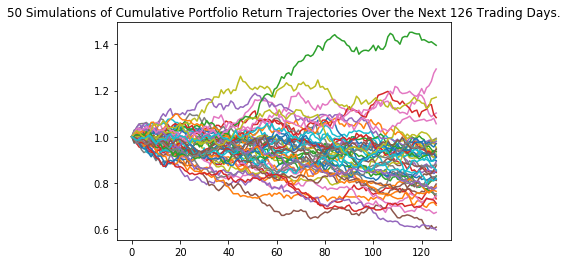

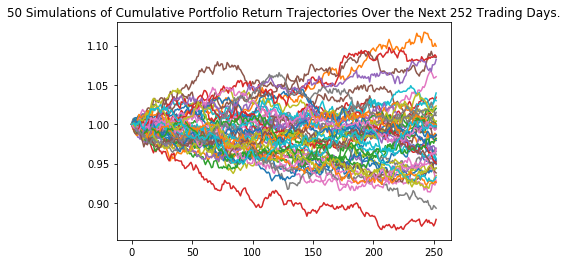

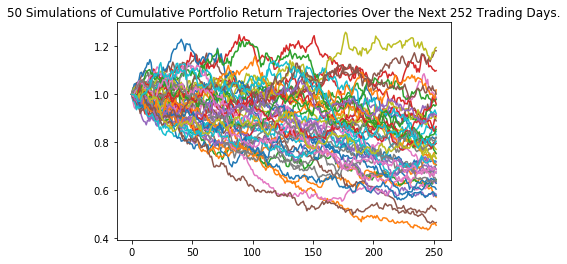

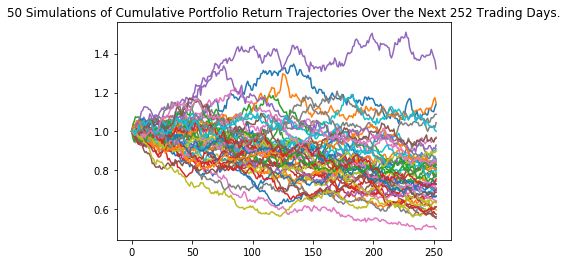

In [5]:
# Create a Title for the Dashboard
title = pn.pane.Markdown("""
         Travel Planner Based on Currency Conversion Risk')
         """,
         width = 400)

welcome = pn.pane.Markdown('''
        This dashboard, created by Richie Garafola, Scott Phillips and Mark Staten presents a visual analysis of travel planning to any desired country in the world based on currency conversion risk. 
        You can navigate through the tabs above to explore more details about the evolution of using a pre determined budget and analyzing the risk of converting currency.
        '''
                          )

# singapore_currency_converter()
Singapore_Data = pn.Column('Singapore Analysis', plot_singapore_candle_stick()) # singapore_plot()
# turkey_currency_converter()
Turkey_Data = pn.Column('Turkey Analysis', plot_turkey_candle_stick())  # turkey_plot()
# uk_currency_converter()
UK_Data = pn.Column('United Kingdom Analysis' ,plot_uk_candle_stick()) # uk_plot()
Joined_Data = pn.Column('Concatonated Data Analysis', joined_data.plot(title = 'Rolling STD For All Countries Currency with 21-day window'), cum_returns.plot(title = 'Cumulative Returns of All datas Daily Returns'), joined_data.plot.box(), joined_forex_21_day_std.plot())

monte_carlo_3_months = pn.Column('Monte Carlo 3 Months', plot_singapore_monte_carlo_3_months(),plot_turkey_monte_carlo_3_months(),plot_uk_monte_carlo_3_months())
monte_carlo_6_months = pn.Column('Monte Carlo 6 Months', plot_singapore_monte_carlo_6_months(),plot_turkey_monte_carlo_6_months(),plot_uk_monte_carlo_6_months())
monte_carlo_12_months = pn.Column('Monte Carlo 12 Months', plot_singapore_monte_carlo_12_months(),plot_turkey_monte_carlo_12_months(),plot_uk_monte_carlo_12_months())

#beta = pn.Row('Beta', plot_beta(), plot_beta_2(), plot_beta_3())

# risk_3_months = pn.Row(sample)

risk_3_months = pn.Column('3 Months Risk', plot_volatility_3, sortino_volatility_3_months) #, sortino_ratio_3)
risk_6_months = pn.Column('6 Months Risk',plot_volatility_6, sortino_volatility_6_months) #, sortino_ratio_6)
risk_12_months = pn.Column('12 Months Risk',plot_volatility_12, sortino_volatility_12_months) #, sortino_ratio_12)

# risk = pn.Row('Risk', plot_combined_data_sharpe_ratio()) #, calmers)               

In [6]:
tabs = pn.Tabs(
    ("Welcome", pn.Column(welcome, plot_world_map())),
    ("Singapore Analysis", Singapore_Data),
    ("Turkey Analysis", Turkey_Data),
    ("United Kingdom Analysis", UK_Data),
    ("Joined Data", Joined_Data),
    ("Monte Carlo Simulation 3 months", monte_carlo_3_months),
    ("Monte Carlo Simulation 6 months", monte_carlo_6_months),
    ("Monte Carlo Simulation 12 months", monte_carlo_12_months),
#    ("Beta", beta),
    ("3 Month Risk Analysis", risk_3_months),
    ("6 Month Risk Analysis", risk_6_months),
    ("12 Month Risk Analysis", risk_12_months),
#    ("Risk Analysis", risk)
    dynamic=True
)   
tabs

### Currency Conversion
dashboard = pn.Column(pn.Row(title),(tabs))

# Serve the dashboard

In [7]:
dashboard.servable()

Column
    [0] Row
        [0] Markdown(str, width=400)
    [1] Tabs(dynamic=True)
        [0] Column
            [0] Markdown(str)
            [1] Plotly(Figure)
        [1] Column
            [0] Markdown(str)
            [1] Plotly(Figure)
        [2] Column
            [0] Markdown(str)
            [1] Plotly(Figure)
        [3] Column
            [0] Markdown(str)
            [1] Plotly(Figure)
        [4] Column
            [0] Markdown(str)
            [1] Plotly(Figure)
            [2] Plotly(Figure)
            [3] Plotly(Figure)
            [4] Plotly(Figure)
        [5] Column
            [0] Markdown(str)
            [1] HoloViews(NdOverlay)
            [2] HoloViews(NdOverlay)
            [3] HoloViews(NdOverlay)
        [6] Column
            [0] Markdown(str)
            [1] HoloViews(NdOverlay)
            [2] HoloViews(NdOverlay)
            [3] HoloViews(NdOverlay)
        [7] Column
            [0] Markdown(str)
            [1] HoloViews(NdOverlay)
            [2] HoloViews(NdOverlay)
            [3] HoloViews(NdOverlay)
        [8] Column
            [0] Markdown(str)
            [1] HoloViews(NdOverlay)
            [2] HoloViews(NdOverlay)
        [9] Column
            [0] Markdown(str)
            [1] HoloViews(NdOverlay)
            [2] HoloViews(NdOverlay)
        [10] Column
            [0] Markdown(str)
            [1] HoloViews(NdOverlay)
            [2] HoloViews(NdOverlay)

# Debugging

In [ ]:
singapore_plot()

In [ ]:
turkey_plot()

In [ ]:
uk_plot()

In [ ]:
#plot_singapore_candle_stick()

In [ ]:
#plot_turkey_candle_stick()

In [ ]:
#plot_uk_candle_stick()

In [ ]:
#singapore_currency_converter()

In [ ]:
#turkey_currency_converter()

In [ ]:
#uk_currency_converter()

In [ ]:
plot_singapore_monte_carlo_3_months()

In [ ]:
plot_singapore_monte_carlo_6_months()

In [ ]:
plot_singapore_monte_carlo_12_months()

In [ ]:
plot_turkey_monte_carlo_3_months()

In [ ]:
plot_turkey_monte_carlo_6_months()

In [ ]:
plot_turkey_monte_carlo_12_months()

In [ ]:
plot_uk_monte_carlo_3_months()

In [ ]:
plot_uk_monte_carlo_6_months()

In [ ]:
plot_uk_monte_carlo_12_months()

In [ ]:
plot_joined_data();

In [ ]:
plot_cumulative_returns();

In [ ]:
plot_joined_data_box();

In [ ]:
plot_joined_forex_21_day_std();

In [ ]:
plot_heatmap();

In [ ]:
plot_beta();

In [ ]:
plot_beta_2();

In [ ]:
plot_beta_3();

In [ ]:
plot_combined_data_sharpe_ratio();

In [ ]:
plot_volatility_3

In [ ]:
plot_volatility_6

In [ ]:
plot_volatility_12

In [ ]:
sortino_volatility_3_months

In [ ]:
sortino_volatility_6_months

In [ ]:
sortino_volatility_12_months

In [ ]:
sortino_ratio_3_months.plot();

In [ ]:
sortino_ratio_6_months.plot();

In [ ]:
sortino_ratio_12_months.plot();

In [ ]:
# plot_calmers()

In [ ]:
plot_world_map()